In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so we can see that there are nan values present in the dataset

# EDA and Visualization

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# from the above dataset our target variable is Survived column 

# cabin column has a lot of nan values as well as it is not very helpful to predict survival resluts

# Also columns like Name, PassengerID and ticket can be dropped as it only acts as a identity of the passenger and logicaly it is not needed to predict survival results


In [7]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


we have filled all the nan values

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

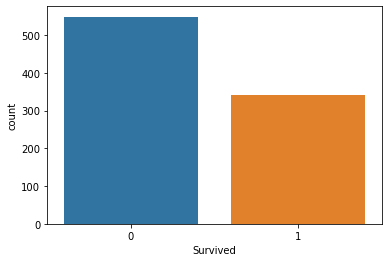

In [16]:
sns.countplot(df['Survived'])

its unbalanced data we will rebalance the dataset after cleansing

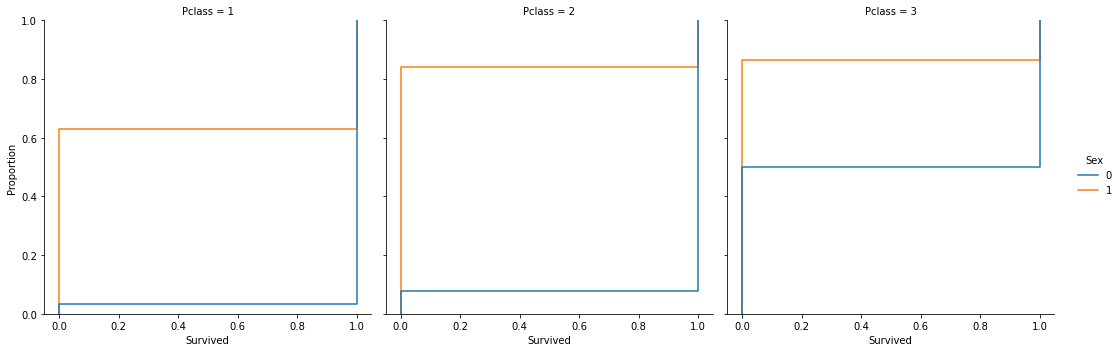

In [17]:
sns.displot(x='Survived',col='Pclass',hue='Sex',data=df,kind='ecdf')

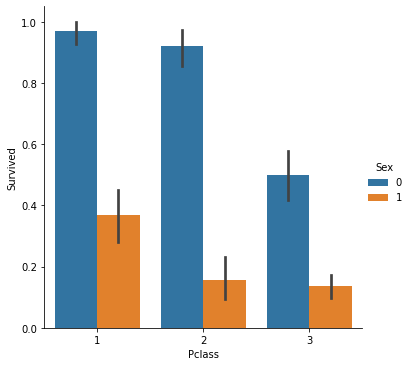

In [18]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')

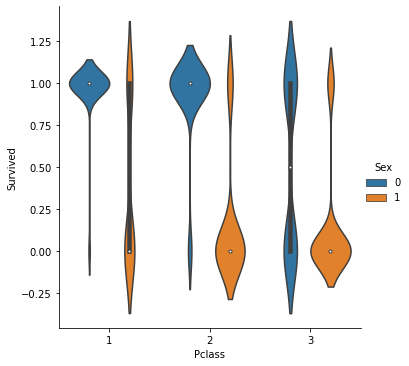

In [19]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='violin')

we can see that the females are given more importance for survival during the sinking of the ship

where sex(male=1 and female=0)

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

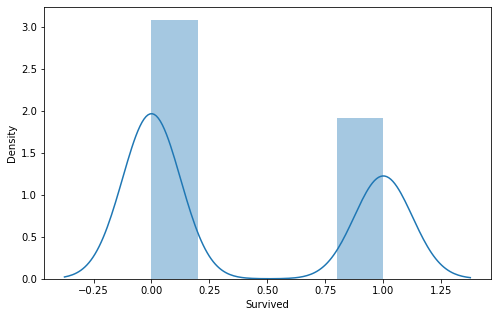

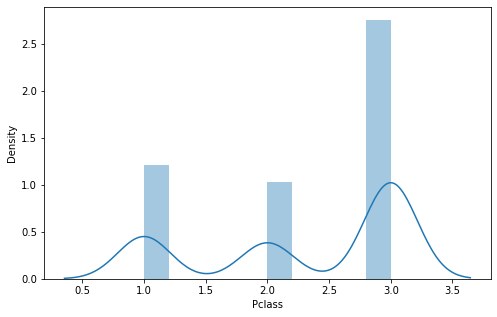

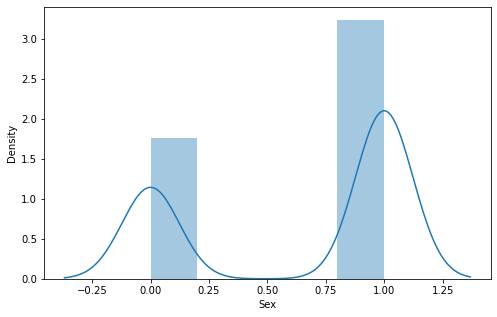

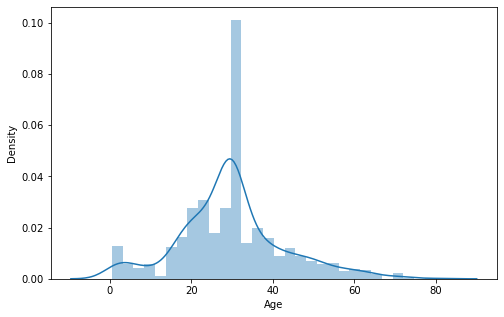

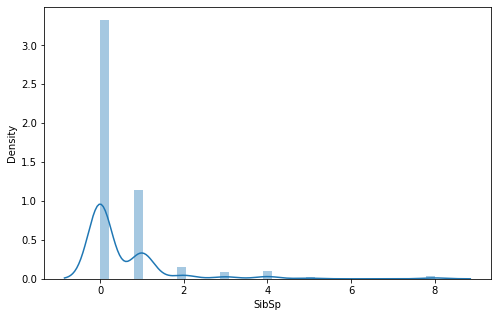

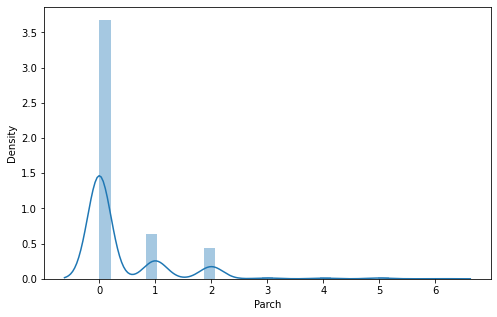

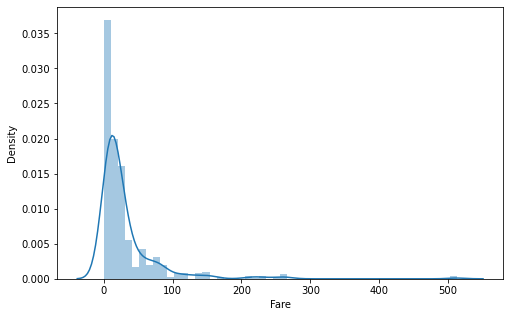

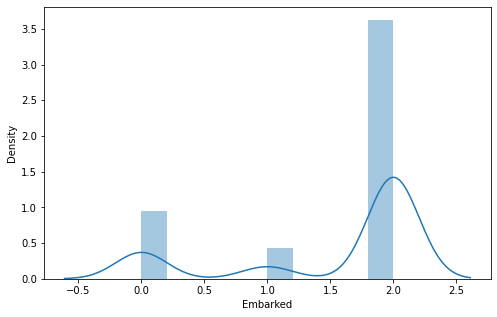

In [20]:
for i in df.columns:
    plt.figure(figsize=(8,5))
    sns.distplot(df[i])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

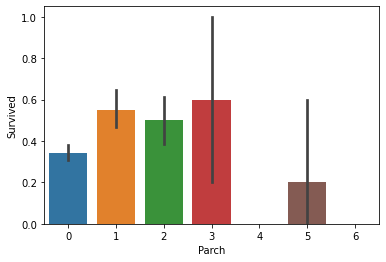

In [38]:
sns.barplot(x='Parch',y='Survived',data=df)

for higher Parch there is less chances of survival

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

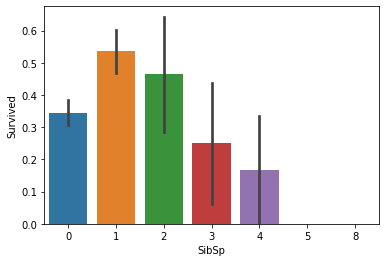

In [39]:
sns.barplot(x='SibSp',y='Survived',data=df)

HIgher the sibsp lesser is the survival chance

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

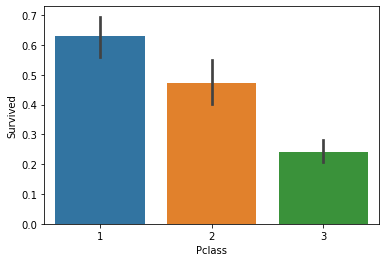

In [40]:
sns.barplot(x='Pclass',y='Survived',data=df)

for pclass 1 there is a high chance of survival compared to pclas 3

In [41]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

we can see there is skewness present in the data

checking outliers

Survived       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Pclass      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Sex         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Age         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
SibSp       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Parch       AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Fare              AxesSubplot(0.125,0.125;0.110714x0.343182)
Embarked       AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

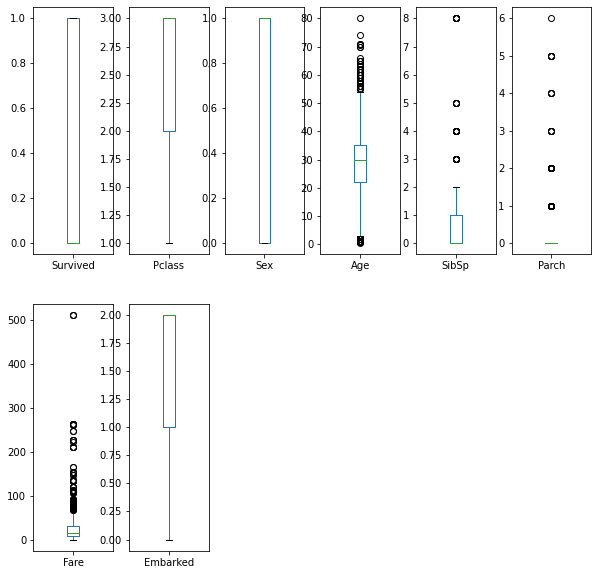

In [22]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

# we can see there are some outliers present in the data

# Sibsp Parch & Age_group have outliers but categorical outliers don’t really exist without context. Hence outliers are valid in categorical data

<AxesSubplot:>

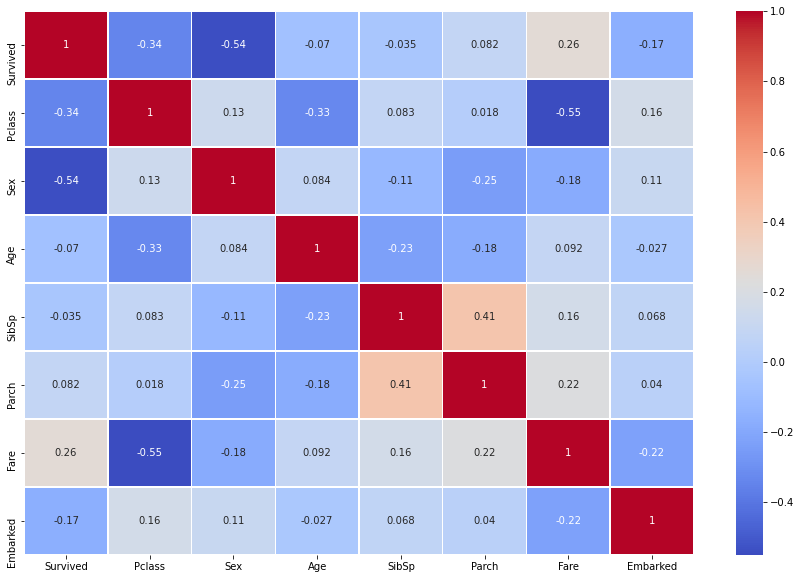

In [23]:
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)

# Balancing the dataset

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [25]:
dfx=df.iloc[:,1:]

In [26]:
dfx

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [27]:
dfy=df['Survived']

In [28]:
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [30]:
x.shape

(1098, 7)

In [31]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

# now the data set is balanced

# Removing Skewness

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[ 0.91963406,  0.91104336, -0.53780078, ..., -0.55122982,
        -0.94745762,  0.65765371],
       [-1.38196556, -1.0976426 ,  0.68305346, ..., -0.55122982,
         1.28434521, -1.70048553],
       [ 0.91963406, -1.0976426 , -0.22263241, ..., -0.55122982,
        -0.85733829,  0.65765371],
       ...,
       [-0.42266859, -1.0976426 ,  0.11405647, ..., -0.55122982,
        -0.35560717,  0.65765371],
       [-1.38196556, -1.0976426 ,  0.75633985, ...,  1.77139718,
         1.40940205, -1.70048553],
       [-1.38196556, -1.0976426 ,  1.44839297, ..., -0.55122982,
         1.12637993, -1.70048553]])

# feature scaling

In [33]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.91963406,  0.91104336, -0.53780078, ..., -0.55122982,
        -0.94745762,  0.65765371],
       [-1.38196556, -1.0976426 ,  0.68305346, ..., -0.55122982,
         1.28434521, -1.70048553],
       [ 0.91963406, -1.0976426 , -0.22263241, ..., -0.55122982,
        -0.85733829,  0.65765371],
       ...,
       [-0.42266859, -1.0976426 ,  0.11405647, ..., -0.55122982,
        -0.35560717,  0.65765371],
       [-1.38196556, -1.0976426 ,  0.75633985, ...,  1.77139718,
         1.40940205, -1.70048553],
       [-1.38196556, -1.0976426 ,  1.44839297, ..., -0.55122982,
         1.12637993, -1.70048553]])

# building models

In [34]:
lg=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
lg.fit(xtrain,ytrain)
lg.score(xtrain,ytrain)

0.8097949886104784

In [35]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [47]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('AUC ROC score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.8272727272727273
[[ 79  24]
 [ 14 103]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       103
           1       0.81      0.88      0.84       117

    accuracy                           0.83       220
   macro avg       0.83      0.82      0.83       220
weighted avg       0.83      0.83      0.83       220

AUC ROC score : 0.8236660858020081


Accuracy score of  DecisionTreeClassifier() is :
0.7954545454545454
[[83 20]
 [25 92]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       103
           1       0.82      0.79      0.80       117

    accuracy                           0.80       220
   macro avg       0.79      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220

AUC ROC score : 0.7960750145216164


Accuracy score of  KNeighborsClassifier() is :
0.8409090909090909
[[ 84  19]
 [ 16 101]]
         

# from above we will take top 3 models for cross validation

In [42]:
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()

Support vector classifier

In [43]:
#accuracy score of svc is 86%
scores=cross_val_score(svc,x,y,cv=5)
print(scores)
print(scores.mean())

[0.77727273 0.82727273 0.77272727 0.89041096 0.91324201]
0.8361851390618513


AdaBoostCLassifier

In [44]:
#accuracy score of adaboost is 85%
scores=cross_val_score(abc,x,y,cv=5)
print(scores)
print(scores.mean())

[0.73636364 0.83181818 0.79090909 0.88584475 0.89954338]
0.828895807388958


In [45]:
#accuracy sscores=cross_val_score(abc,x,y,cv=5)
scores=cross_val_score(gb,x,y,cv=5)
print(scores)
print(scores.mean())

[0.78636364 0.83181818 0.8        0.89954338 0.91324201]
0.8461934412619343


# from above we can see that all models are having less differnece so will check after hyper tuning

# hyper parameter tuning

Gradient boosting tuning

In [52]:
parameters={'n_estimators':[10,100,500],'criterion':['friedman_mse', 'mse', 'mae'],'loss':['deviance','exponential']}
clf=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

{'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 100}

In [65]:
gb=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential', n_estimators= 100)
gb.fit(xtrain,ytrain)
gb.score(xtrain,ytrain)
pred=gb.predict(xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('AUC ROC score :',roc_auc_score(ytest,pred))
print('\n')

0.8727272727272727
[[ 90  13]
 [ 15 102]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.89      0.87      0.88       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

AUC ROC score : 0.8727906397809311




SUPPORT VECTOR CLASSIFIER

In [58]:
parameters={'kernel':['poly','rbf','sigmoid'],'gamma':['sclae','auto'],'max_iter':list(range(3,11))}
clf=GridSearchCV(SVC(),parameters,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

{'gamma': 'auto', 'kernel': 'poly', 'max_iter': 8}

In [63]:
svc=SVC(gamma='auto',kernel='poly',max_iter=8)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('AUC ROC score :',roc_auc_score(ytest,pred))
print('\n')

0.5590909090909091
[[  8  95]
 [  2 115]]
              precision    recall  f1-score   support

           0       0.80      0.08      0.14       103
           1       0.55      0.98      0.70       117

    accuracy                           0.56       220
   macro avg       0.67      0.53      0.42       220
weighted avg       0.67      0.56      0.44       220

AUC ROC score : 0.5302879429093021




# we can conlude that gradient boosting classifier is the best model 

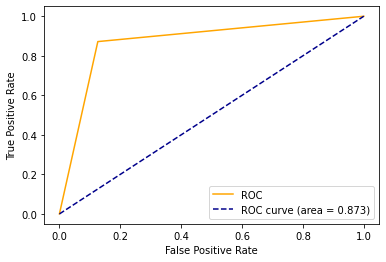

In [67]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Save model

In [68]:
joblib.dump(gb,'titanic.obj')

['titanic.obj']